In [1]:
x=1

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import scanpy as sc
import numpy as np
import pandas as pd
import muon as mu
import scib

During startup - Warning message:
Setting LC_CTYPE failed, using "C" 


In [3]:
rna = sc.read('../../../data/neurips-multiome/rna_hvg_batch.h5ad')
rna = rna.copy()
rna

AnnData object with n_obs × n_vars = 69249 × 4000
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'ATAC_gene_activity_var_names', 'Site_colors', 'batch_colors', 'cell_type_colors', 'dataset_id', 'genome', 'hvg', 'log1p', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap', 'X_umap'
    layers: 'counts'

In [4]:
atac = sc.read('../../../data/neurips-multiome/atac_hvf.h5ad')
atac = atac.copy()
atac

AnnData object with n_obs × n_vars = 69249 × 40002
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay'
    var: 'feature_types', 'gene_id', 'n_cells', 'prop_shared_cells', 'variability_score'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'binary', 'counts', 'cpm', 'tf-idf', 'tf-idf-binary', 'tf-idf-counts'

In [5]:
mdata = mu.MuData({'rna': rna, 'atac': atac})
mdata

MuData object with n_obs × n_vars = 69249 × 44002
  var:	'feature_types', 'gene_id'
  2 modalities
    rna:	69249 x 4000
      obs:	'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
      var:	'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'ATAC_gene_activity_var_names', 'Site_colors', 'batch_colors', 'cell_type_colors', 'dataset_id', 'genome', 'hvg', 'log1p', 'organism'
      obsm:	'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap', 'X_umap'
      layers:	'counts'
    atac:	69249 x 40002
      obs:	'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay'
      var:	'feature_types', 'gene_id', 'n_cells', 'prop_shared_cells', 'variability_score'
      uns:	'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
      obsm:	'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
      layers:	'binary', 'counts', 'cpm', 'tf-idf', 'tf-idf-binary', 'tf-idf-counts'

In [6]:
mdata.obs['batch'] = mdata['rna'].obs['batch'].astype('category').copy()
mdata.obs['cell_type'] = mdata['rna'].obs['cell_type'].astype('category').copy()

In [7]:
np.max(rna.X)

8.883084

In [8]:
atac.X = atac.layers['cpm'].copy()
np.max(atac.X)

161.29031

In [9]:
mu.tl.mofa(
    mdata, 
    groups_label='batch',
    gpu_mode = False,
)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='s1d1' with N=6224 samples and D=4000 features...
Loaded view='rna' group='s1d2' with N=6740 samples and D=4000 features...
Loaded view='rna' group='s1d3' with N=4279 samples and D=4000 features...
Loaded view='rna' group='s2d1' with N=4220 samples and D=4000 features...
Loaded view='rna' group='s2d4' with N=6111 samples and D=4000 features...
Loaded view

In [10]:
sc.pp.neighbors(mdata, use_rep='X_mofa')
sc.tl.umap(mdata)

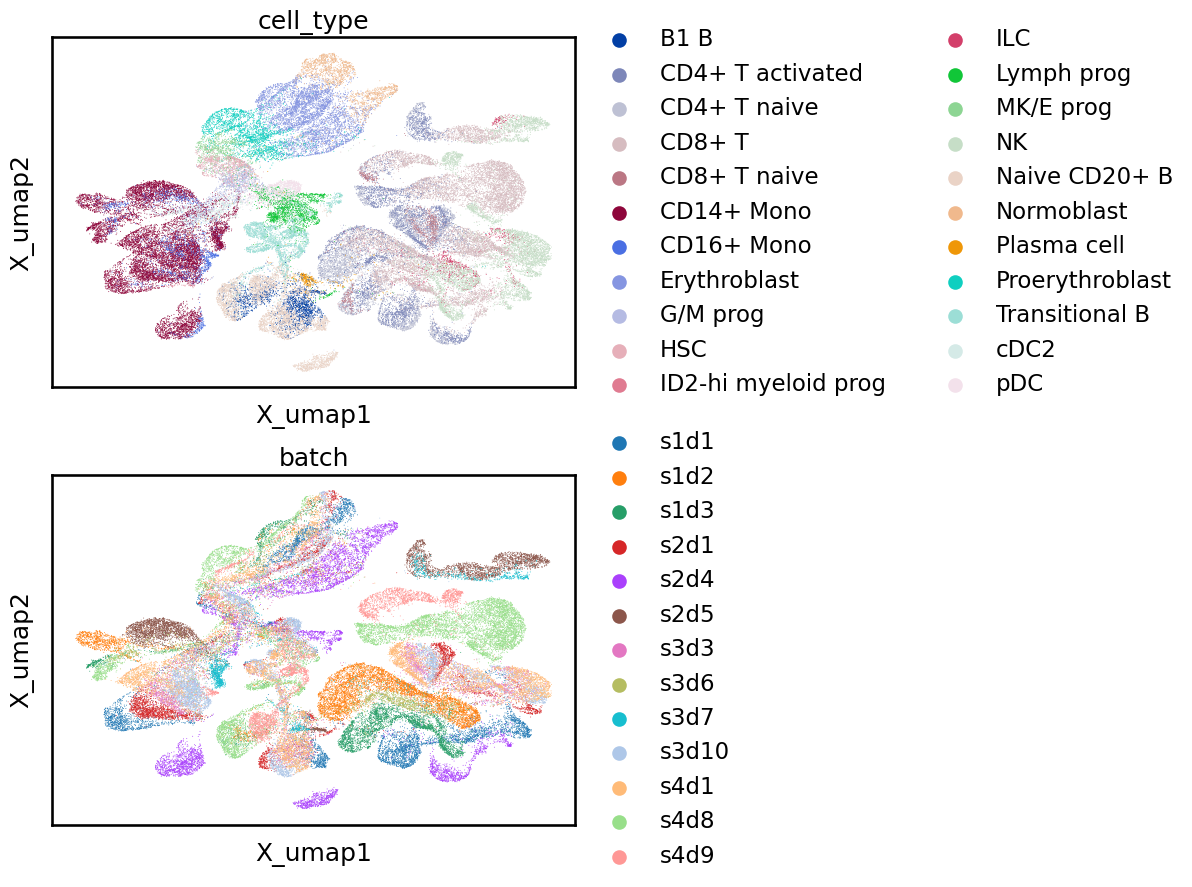

In [11]:
mu.pl.embedding(mdata, color=['cell_type', 'batch'], ncols=1, basis='umap', save='_neurips_multiome_mofa.png')

In [12]:
scib_anndata = sc.AnnData(mdata.obsm['X_mofa']).copy()
scib_anndata.obs = mdata.obs.copy()
scib_anndata.uns['neighbors'] = mdata.uns['neighbors'].copy()
scib_anndata.obsp['connectivities'] = mdata.obsp['connectivities'].copy()
scib_anndata.obsp['distances'] = mdata.obsp['distances'].copy()
scib_anndata.obsm['X_mofa'] = mdata.obsm['X_mofa'].copy()

In [13]:
scib_anndata.write('neurips_multiome_mofa.h5ad')

In [14]:
metrics_mofa = scib.metrics.metrics(
    scib_anndata, 
    scib_anndata, 
    batch_key='batch', 
    label_key='cell_type', 
    embed='X_mofa',
    ari_=True,
    nmi_=True,
    silhouette_=True,
    graph_conn_=True,
    isolated_labels_asw_=True,
)
metrics_mofa

NMI...
ARI...
Silhouette score...
Isolated labels ASW...
Graph connectivity...


,0
NMI_cluster/label,0.606385
ARI_cluster/label,0.258605
ASW_label,0.534082
ASW_label/batch,0.813457
PCR_batch,NaN
cell_cycle_conservation,NaN
isolated_label_F1,NaN
isolated_label_silhouette,0.486203
graph_conn,0.923153
kBET,NaN


In [15]:
metrics_mofa.to_csv('neurips_multiome_mofa.csv')